In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob, json

In [74]:
model_name = "codebert"
formatted_name= "CodeBERT"
model_acr = 'cb'
dataset = "devign"
task="vd"

In [75]:
def read_json_file(file_path):
    """
    Reads a JSON file and returns the data as a dictionary.

    Parameters:
    - file_path: str, the path to the JSON file

    Returns:
    - data: dict, the data from the JSON file
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        return data
    except FileNotFoundError:
        print(f"The file {file_path} was not found.")
    except json.JSONDecodeError:
        print(f"The file {file_path} is not a valid JSON file.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [76]:
files = {}

In [77]:
raw_data = list(glob.iglob(f"../extracted_data/{dataset}/{model_acr}/*.json"))

In [78]:
raw_data

['./devign/cb/codebert-base_all_seq_lengths.json',
 './devign/cb/codebert-base_even_idx_seq_lengths.json',
 './devign/cb/codebert-base_none_seq_lengths.json',
 './devign/cb/codebert-base_odd_idx_seq_lengths.json']

In [79]:
for _file in raw_data:
    if "odd" in _file:
        files["Odd Layers"] = read_json_file(_file)
    if "all" in _file:
        files["All Layers"] = read_json_file(_file)
    if "even" in _file:
        files["Even Layers"] = read_json_file(_file)
    if "none" in _file:
        files["No Pruning"] = read_json_file(_file)

In [80]:
def dict_to_dataframe(data_dict):
    # Create a list to hold the data
    data = []
    
    # Iterate over the items in the dictionary to create
    # a flat list of dictionaries
    for layer_type, values in data_dict.items():
        for layer_num, value in values.items():
            data.append({'Method': layer_type, 'Layer': int(layer_num), 'Avg. Seq. Length': value})
    
    # Convert the list of dictionaries to a DataFrame
    return pd.DataFrame(data)

In [81]:
df = dict_to_dataframe(files)

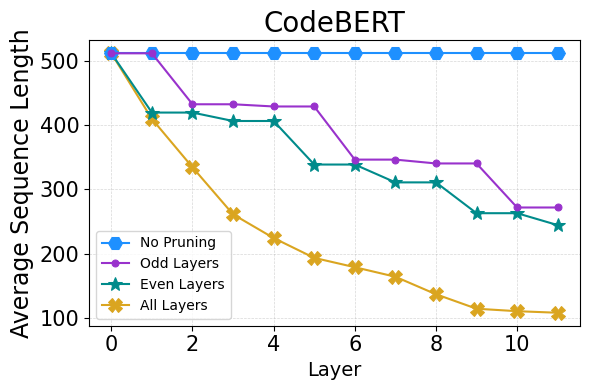

In [83]:
plt.figure(figsize=(6, 4))
ax = sns.lineplot(
    data=df, 
    x="Layer", 
    y="Avg. Seq. Length", 
    hue="Method", 
    style="Method",
    markers = {
        "No Pruning": "H", 
        "All Layers": "X",
        "Odd Layers": ".",
        "Even Layers": "*"}, 
    markeredgecolor=None,
    palette = {
        "No Pruning": "dodgerblue", 
        "All Layers": "goldenrod",
        "Odd Layers": "darkorchid",
        "Even Layers": "darkcyan"},
    dashes=False)
plt.grid(linestyle='--', linewidth='0.5', alpha=0.5)

#plt.legend(title="Pruning Method", prop={'size': 8})
plt.legend(title='Pruning Method',title_fontsize=10, fontsize=10)
# Show the plot
legend = ax.legend()
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['left'].set_color('black')
legend.get_frame().set_linewidth(0.5)
for text in legend.get_texts():
    text.set_color('black')
    text.set_fontsize(14)
for line in ax.lines:
    line.set_markersize(10)
for handle in legend.legend_handles:
    handle.set_markersize(5)
ax.set_xlabel('Layer', fontsize=14)
ax.set_ylabel('Average Sequence Length', fontsize=17)
ax.set_title(formatted_name, fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,3,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.tight_layout()
plt.savefig(f"./{task}_{model_name}_{dataset}.pdf")
plt.show()